# Problem Definition

The problem is based on a data set called 'Sample Insurance Claim Prediction Dataset. This is based on 'Medical Cost Personal Dataset'. 

The dataset contains 7 features that can be used to predict the insurance claim. In this report, we are going to perform a Logistic Regression to predict `insuranceclaim` and evalue ate the model using cross-fold validation of 4 folds.

(Source: https://www.kaggle.com/datasets/easonlai/sample-insurance-claim-prediction-dataset)

# Exploratory Data Analysis

## Feature Summary 

- `age`: Age of policyholder
- `sex`: gender of policyholder (female=0, male=1)
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 25
- `children`: number of children/dependents of policyholder
- `smoker`: smoking state of policyholder (non-smoker=0, smoker=1)
- `region`: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
- `charges`: individual medical costs billed by health insurance
- `insuranceclaim`: target variable (yes=1, no=0)

## Data Summary

### Load the dataset

In [1]:
import pandas as pd

# Setup Data
FILE = "./insurance2.csv"
df = pd.read_csv(FILE)
# print(df)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [2]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [36]:
# Separate into x and y values
predictor_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

X = df[predictor_variables]
y = df['insuranceclaim']

## Data Visualization

### Target Distribution

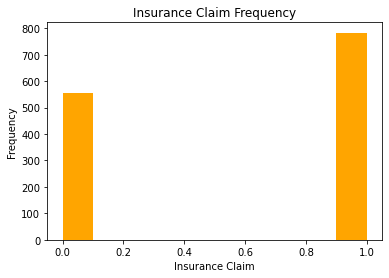

In [7]:
from matplotlib import pyplot as plt

plt.hist(df["insuranceclaim"], color="orange")
plt.xlabel("Insurance Claim")
plt.ylabel("Frequency")
plt.title("Insurance Claim Frequency")
plt.show()

### Predictor Variables Distribution

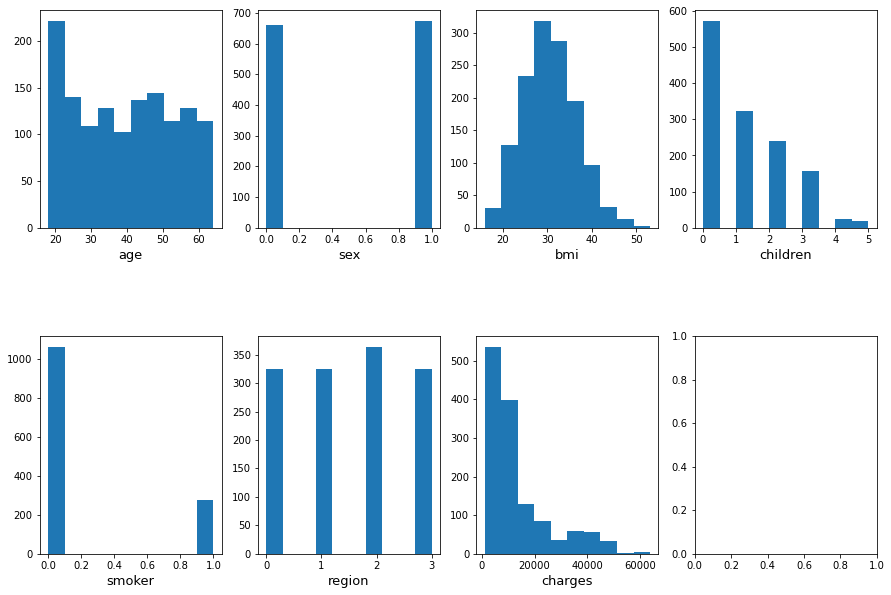

In [8]:
features = df.columns
plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i in range(1, len(features)):
    plt.subplot(2, 4, i)
    plt.hist(df[features[i - 1]])
    plt.xlabel(features[i - 1], fontsize=13)

plt.show()

### Correlation of Columns

In [11]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


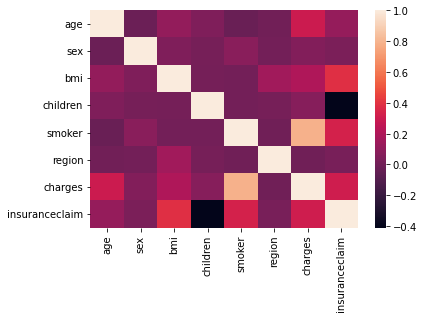

In [12]:
import seaborn as sns

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

### Feature Segmentation

<Figure size 36x288 with 0 Axes>

<Figure size 36x288 with 0 Axes>

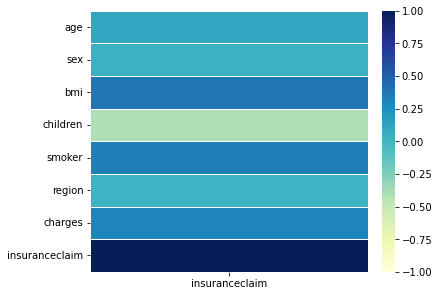

In [13]:
plt.figure(figsize=(0.5, 4))
plt.figure(figsize = (0.5,4))
plt.figure(constrained_layout=True)
ax = sns.heatmap(corr[['insuranceclaim']],
                 linewidth=0.5, vmin=-1,
                 vmax=1, cmap="YlGnBu")
plt.show()

# Model Development

## Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

# Show chi-square scores for each feature
test = SelectKBest(score_func=chi2, k=5)
chi_scores = test.fit(X, y)
np.set_printoptions(precision=3)

print("\nPredictor variables: " + str(predictor_variables))
print("Predictor Chi-Square Scores: " + str(chi_scores.scores_))

# Showing the most statistically significant variables
cols = chi_scores.get_support(indices=True)
print(cols)
features = X.columns[cols]
print(np.array(features))


Predictor variables: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Predictor Chi-Square Scores: [8.706e+01 6.596e-01 2.393e+02 2.976e+02 1.182e+02 4.700e-01 1.415e+06]
[0 2 3 4 6]
['age' 'bmi' 'children' 'smoker' 'charges']


In [17]:
# Showing the most statistically significant variables
cols = chi_scores.get_support(indices=True)
# print(cols)
features = X.columns[cols]
# print(np.array(features))

# Re-assign X with significant columns only after chi-square test
X = df[['age', 'bmi', 'children', 'smoker']]

### PairPlot of `age`, `bmi`, `children`, `smoker` with `insuranceclaim`

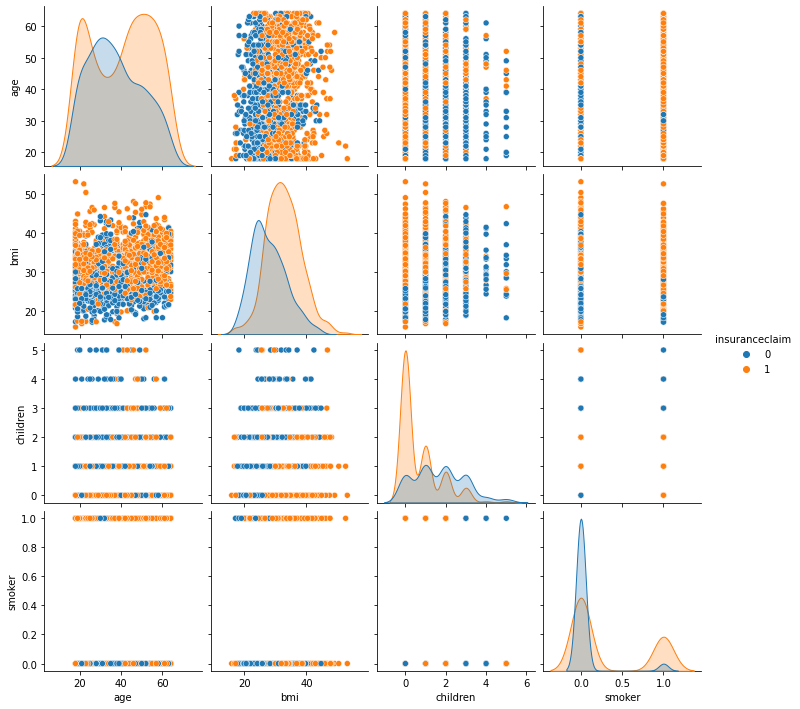

In [25]:
sns.pairplot(data=df, vars=['age', 'bmi', 'children', 'smoker'], hue='insuranceclaim')

The plot shows that there are some clear differences between the distributions of the variables for those who make an insurance claim versus those who do not. 

For example, there is more possibility of the insurance claim for smokers than non-smokers. Also, those whose bmi are between 20 and 50 more likely get the insurance claimed. 

## Model Evaluation

In [24]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pickle

# Model Evaluation
scalers = {'no scaler': None,
           'minmax_scaler': MinMaxScaler(),
           'standard_scaler': StandardScaler(),
           'robust_scaler': RobustScaler()}

# Cross fold of 4 folds
num_folds = 4
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Accuracy, Precision, Recall, F1 score + Confusion Matrix
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}


def getTestAndTrainData(trainIndexes, testIndexes, df):
    dfTrain = df.iloc[trainIndexes, :]  # Gets all rows with train indexes.
    dfTest = df.iloc[testIndexes, :]

    X_train = dfTrain[['age', 'bmi', 'children', 'smoker']]
    X_test = dfTest[['age', 'bmi', 'children', 'smoker']]
    y_train = dfTrain['insuranceclaim']
    y_test = dfTest['insuranceclaim']
    return X_train, X_test, y_train, y_test


for scaler_name, scaler in scalers.items():
    accuracy_scores[scaler_name] = []
    precision_scores[scaler_name] = []
    recall_scores[scaler_name] = []
    f1_scores[scaler_name] = []

    for train_index, test_index in kf.split(df):
        X_train, X_test, y_train, y_test = getTestAndTrainData(train_index, test_index, df)

        if scaler is not None:
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        logistic_model = LogisticRegression(fit_intercept=True, solver='liblinear', random_state=0)
        logistic_model.fit(X_train, y_train)
        
        # Save the model
        with open(f"model_pkl_{scaler_name}", 'wb') as files:
            pickle.dump(logistic_model, files)

        y_pred = logistic_model.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)

        accuracy_scores[scaler_name].append(accuracy)
        precision_scores[scaler_name].append(precision)
        recall_scores[scaler_name].append(recall)
        f1_scores[scaler_name].append(f1)

        cm = metrics.confusion_matrix(y_test, y_pred)
        print(f"\nConfusion matrix ({scaler_name})")
        print(cm)

    print(f"\nAverage scores ({scaler_name}):")
    print(f"Accuracy: {np.mean(accuracy_scores[scaler_name]): .3f}, Std: {np.std(accuracy_scores[scaler_name]): .3f}")
    print(f"Precision: {np.mean(precision_scores[scaler_name]):.3f}, Std: {np.std(precision_scores[scaler_name]): .3f}")
    print(f"Recall: {np.mean(recall_scores[scaler_name]):.3f}, Std: {np.std(recall_scores[scaler_name]): .3f}")
    print(f"F1: {np.mean(f1_scores[scaler_name]):.3f}, Std: {np.std(f1_scores[scaler_name]): .3f}")


Confusion matrix (no scaler)
[[124  25]
 [ 14 172]]

Confusion matrix (no scaler)
[[108  25]
 [ 17 185]]

Confusion matrix (no scaler)
[[106  27]
 [ 18 183]]

Confusion matrix (no scaler)
[[114  26]
 [ 11 183]]

Average scores (no scaler):
Accuracy:  0.878, Std:  0.009
Precision: 0.875, Std:  0.004
Recall: 0.924, Std:  0.012
F1: 0.899, Std:  0.006

Confusion matrix (minmax_scaler)
[[121  28]
 [ 17 169]]

Confusion matrix (minmax_scaler)
[[107  26]
 [ 17 185]]

Confusion matrix (minmax_scaler)
[[104  29]
 [ 18 183]]

Confusion matrix (minmax_scaler)
[[115  25]
 [ 12 182]]

Average scores (minmax_scaler):
Accuracy:  0.871, Std:  0.011
Precision: 0.869, Std:  0.009
Recall: 0.918, Std:  0.012
F1: 0.893, Std:  0.010

Confusion matrix (standard_scaler)
[[129  20]
 [ 18 168]]

Confusion matrix (standard_scaler)
[[112  21]
 [ 22 180]]

Confusion matrix (standard_scaler)
[[108  25]
 [ 18 183]]

Confusion matrix (standard_scaler)
[[117  23]
 [ 14 180]]

Average scores (standard_scaler):
Accurac

### Model performance using *No Scaler*

| Metrics   | Average | Standard Deviation |
|-----------|---------|--------------------|
| Accuracy  | 0.878   | 0.009              |
| Precision | 0.875   | 0.004              |
| Recall    | 0.924   | 0.012              |
| F1        | 0.899   | 0.006              |

### Model performance using *MinMaxScaler*

| Metrics   | Average | Standard Deviation |
|-----------|---------|--------------------|
| Accuracy  | 0.871   | 0.011              |
| Precision | 0.869   | 0.009              |
| Recall    | 0.918   | 0.012              |
| F1        | 0.893   | 0.010              |

### Model performance using *StandardScaler*

| Metrics   | Average | Standard Deviation |
|-----------|---------|--------------------|
| Accuracy  | 0.880   | 0.008              |
| Precision | 0.889   | 0.006              |
| Recall    | 0.908   | 0.013              |
| F1        | 0.898   | 0.005              |

### Model performance using *RobustScaler*

| Metrics   | Average | Standard Deviation |
|-----------|---------|--------------------|
| Accuracy  | 0.879   | 0.009              |
| Precision | 0.883   | 0.008              |
| Recall    | 0.915   | 0.013              |
| F1        | 0.898   | 0.005              |

Based on the average scores, it appears that the `StandardScaler` performs the best with the highest average scores of accuracy, precision, recall, and F1. The `RobustScaler` also performs well but has slightly lower scores than the `StandardScaler`. The `MinMaxScaler` performs the worst with the lowest scores for all metrics. However, it's worth noting that the standard deviation of the scores is relatively small for all scalers, indicating that the performance is consistent across multiple trials.

In conclusion, the Standard Scaler seems to be performing the best with the highest average F1 score and precision. Therefore, we are going to save the model using the `StandardScaler` for the application.

# Conclusion

In conclusion, with four selected features 'age', 'bmi', 'children', and 'smoker', the Logistic Regression model using StandardScaler is the best model among plain Logistic Regression model, MinMaxScaler, and RobustScaler. 

In [30]:
# model_path = settings.BASE_DIR/'model_pkl_standard_scaler'
model_path = './model_pkl_standard_scaler'
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Create a single prediction
single_sample_df = pd.DataFrame(columns=['age', 'bmi', 'children', 'smoker'])

# bmi = weight / (height ** 2)
# # smoker = 1 if smoker == "Yes" else 0
# print("***bmi: " + str(bmi))
# print("***smoker: " + str(smoker))

single_sample_df = single_sample_df.append({'age': 22, 'bmi': 25, 'children': 0, 'smoker': 1}, ignore_index=True)
single_pred = loaded_model.predict(single_sample_df)
print("Single prediction: " + str(single_pred))

Single prediction: [1]


/var/folders/wg/1s6ph52j7012nnhnrg3cxmtw0000gn/T/ipykernel_78029/2955575460.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  single_sample_df = single_sample_df.append({'age': 22, 'bmi': 25, 'children': 0, 'smoker': 1}, ignore_index=True)
/Users/moon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
